# **1. Segmentation**
Segmentation은 컴퓨터 비전에서 이미지나 영상을 픽셀 단위로 분할하여 각 영역이 무엇을 나타내는지 구분하는 기술입니다. 이는 크게 Semantic Segmentation과 Instance Segmentation으로 나뉘는데, Semantic Segmentation은 같은 종류의 객체를 동일한 클래스로 분류하는 반면, Instance Segmentation은 같은 클래스 내에서도 개별 객체를 구분합니다. 이를 통해 의료 영상 분석, 자율주행, 위성 이미지 처리 등 다양한 분야에서 정밀한 객체 인식을 수행할 수 있습니다. Segmentation 모델로는 U-Net, DeepLab, Mask R-CNN 등이 널리 사용됩니다.

<img src="https://blog.kakaocdn.net/dna/bUla0i/btsMEoFBBFg/AAAAAAAAAAAAAAAAAAAAANsTt4jCSTsz_hIMnLIvRyfxueUeIt8B9HAc77CCnSYm/img.png?credential=yqXZFxpELC7KVnFOS48ylbz2pIh7yKj8&expires=1759244399&allow_ip=&allow_referer=&signature=DRf9Vhv84aHG46%2B8NmyjLocAbYw%3D">

In [1]:
!pip install -q ultralytics opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 33.3 MB/s eta 0:00:00


In [2]:
import os
import random
import shutil
import ultralytics
from tqdm import tqdm
import cv2
import glob
import json
import matplotlib.pyplot as plt
import numpy as np
from pycocotools import mask as maskUtils
from torchvision import transforms

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
!unzip -q /content/starbucks/starbucks.zip -d /content/starbucks/

In [ ]:
data_root = '/content/starbucks/'

In [ ]:
data_list = glob.glob(f'{data_root}/*.jpg') + glob.glob(f'{data_root}/*.jpeg')
data_list

['/content/starbucks/starbucks28.jpg',
 '/content/starbucks/starbucks14.jpg',
 '/content/starbucks/starbucks22.jpg',
 '/content/starbucks/starbucks39.jpg',
 '/content/starbucks/starbucks38.jpg',
 '/content/starbucks/starbucks36.jpg',
 '/content/starbucks/starbucks33.jpg',
 '/content/starbucks/starbucks37.jpg',
 '/content/starbucks/starbucks20.jpg',
 '/content/starbucks/starbucks34.jpg',
 '/content/starbucks/starbucks15.jpg',
 '/content/starbucks/starbucks23.jpg',
 '/content/starbucks/starbucks26.jpg',
 '/content/starbucks/starbucks29.jpg',
 '/content/starbucks/starbucks19.jpg',
 '/content/starbucks/starbucks21.jpg',
 '/content/starbucks/starbucks13.jpg',
 '/content/starbucks/starbucks32.jpg',
 '/content/starbucks/starbucks40.jpg',
 '/content/starbucks/starbucks12.jpg',
 '/content/starbucks/starbucks11.jpg',
 '/content/starbucks/starbucks30.jpg',
 '/content/starbucks/starbucks35.jpg',
 '/content/starbucks/starbucks31.jpg',
 '/content/starbucks/starbucks18.jpg',
 '/content/starbucks/star

In [ ]:
def load_coco_annotations(json_path):
    with open(json_path, 'r') as f:
        data = json.load(f)
    return data

In [ ]:
load_coco_annotations(f'{data_root}/instances_default.json')

{'licenses': [{'name': '', 'id': 0, 'url': ''}],
 'info': {'contributor': '',
  'date_created': '',
  'description': '',
  'url': '',
  'version': '',
  'year': ''},
 'categories': [{'id': 1, 'name': 'logo', 'supercategory': ''},
  {'id': 2, 'name': 'text', 'supercategory': ''}],
 'images': [{'id': 1,
   'width': 236,
   'height': 214,
   'file_name': 'starbucks11.jpg',
   'license': 0,
   'flickr_url': '',
   'coco_url': '',
   'date_captured': 0},
  {'id': 2,
   'width': 201,
   'height': 251,
   'file_name': 'starbucks12.jpg',
   'license': 0,
   'flickr_url': '',
   'coco_url': '',
   'date_captured': 0},
  {'id': 3,
   'width': 395,
   'height': 128,
   'file_name': 'starbucks13.jpg',
   'license': 0,
   'flickr_url': '',
   'coco_url': '',
   'date_captured': 0},
  {'id': 4,
   'width': 301,
   'height': 167,
   'file_name': 'starbucks14.jpg',
   'license': 0,
   'flickr_url': '',
   'coco_url': '',
   'date_captured': 0},
  {'id': 5,
   'width': 275,
   'height': 183,
   'file_n

In [ ]:
def load_coco_annotations(json_path):
    with open(json_path, 'r') as f:
        data = json.load(f)
    return data

In [ ]:
load_coco_annotations(f'{data_root}/instances_default.json')

{'licenses': [{'name': '', 'id': 0, 'url': ''}],
 'info': {'contributor': '',
  'date_created': '',
  'description': '',
  'url': '',
  'version': '',
  'year': ''},
 'categories': [{'id': 1, 'name': 'logo', 'supercategory': ''},
  {'id': 2, 'name': 'text', 'supercategory': ''}],
 'images': [{'id': 1,
   'width': 236,
   'height': 214,
   'file_name': 'starbucks11.jpg',
   'license': 0,
   'flickr_url': '',
   'coco_url': '',
   'date_captured': 0},
  {'id': 2,
   'width': 201,
   'height': 251,
   'file_name': 'starbucks12.jpg',
   'license': 0,
   'flickr_url': '',
   'coco_url': '',
   'date_captured': 0},
  {'id': 3,
   'width': 395,
   'height': 128,
   'file_name': 'starbucks13.jpg',
   'license': 0,
   'flickr_url': '',
   'coco_url': '',
   'date_captured': 0},
  {'id': 4,
   'width': 301,
   'height': 167,
   'file_name': 'starbucks14.jpg',
   'license': 0,
   'flickr_url': '',
   'coco_url': '',
   'date_captured': 0},
  {'id': 5,
   'width': 275,
   'height': 183,
   'file_n

In [ ]:
# 이미지 파일 불러오기
def load_image(image_path):
    image = cv2.imread(image_path)
    if image is None:
        raise FileNotFoundError(f'이미지를 찾을 수 없음: {image_path}')
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

array([[[100,  81,  64],
        [ 97,  76,  57],
        [103,  76,  55],
        ...,
        [177, 144, 135],
        [177, 144, 135],
        [177, 144, 135]],

       [[ 99,  73,  58],
        [ 92,  63,  49],
        [ 97,  64,  49],
        ...,
        [182, 146, 130],
        [182, 146, 130],
        [182, 146, 130]],

       [[130,  93,  75],
        [117,  78,  61],
        [122,  78,  65],
        ...,
        [189, 157, 136],
        [189, 157, 136],
        [189, 157, 136]],

       ...,

       [[160,  72,  32],
        [134,  47,   4],
        [143,  55,   7],
        ...,
        [ 66,  45,  42],
        [ 66,  45,  42],
        [ 66,  45,  42]],

       [[211,  99,  17],
        [211, 101,   4],
        [211, 103,   0],
        ...,
        [ 59,  42,  50],
        [ 59,  42,  50],
        [ 59,  42,  50]],

       [[222, 110,  24],
        [222, 112,  14],
        [222, 115,   1],
        ...,
        [ 59,  42,  50],
        [ 59,  42,  50],
        [ 59,  42,  50]]], dtype=uint8)
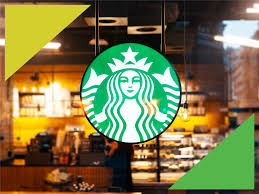

In [ ]:
load_image(data_list[2])

In [ ]:
def draw_annotations(image, annotations, image_id):
    for ann in annotations:
        if ann['image_id'] == image_id and 'segmentation' in ann:
            segmentation = ann['segmentation']

            for seg in segmentation:
                if isinstance(seg, list) and len(seg) >= 6:
                    points = np.array(seg).reshape(-1, 2).astype(np.int32)
                    cv2.polylines(image, [points], isClosed=True, color=(0, 255, 0), thickness=2)
    return image

In [ ]:
def visualize_coco(json_path, image_folder, image_id):
    coco_data = load_coco_annotations(json_path)
    image_info = next((img for img in coco_data['images'] if img['id'] == image_id), None)
    if not image_info:
        raise ValueError(f'Image ID {image_id} not found in COCO JSON file')

    image_path = os.path.join(image_folder, image_info['file_name'])
    image = load_image(image_path)
    annotated_image = draw_annotations(image, coco_data['annotations'], image_id)

    plt.figure(figsize=(8, 6))
    plt.imshow(annotated_image)
    plt.axis('off')
    plt.title(f'Image ID: {image_id} with Annotations')
    plt.show()

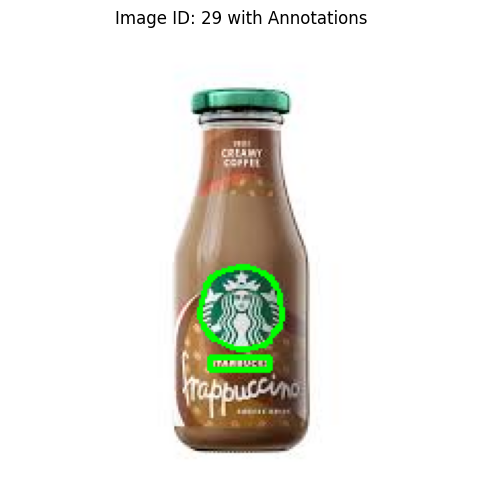

In [ ]:
visualize_coco(f'{data_root}/instances_default.json', f'{data_root}', 29)

In [ ]:
coco_json_path = f'{data_root}/instances_default.json'
yolo_output_folder = f'{data_root}'
image_folder = f'{data_root}'

with open(coco_json_path, 'r') as f:
    coco_data = json.load(f)

image_dict = {img['id']: img for img in coco_data['images']}
image_dict

{1: {'id': 1,
  'width': 236,
  'height': 214,
  'file_name': 'starbucks11.jpg',
  'license': 0,
  'flickr_url': '',
  'coco_url': '',
  'date_captured': 0},
 2: {'id': 2,
  'width': 201,
  'height': 251,
  'file_name': 'starbucks12.jpg',
  'license': 0,
  'flickr_url': '',
  'coco_url': '',
  'date_captured': 0},
 3: {'id': 3,
  'width': 395,
  'height': 128,
  'file_name': 'starbucks13.jpg',
  'license': 0,
  'flickr_url': '',
  'coco_url': '',
  'date_captured': 0},
 4: {'id': 4,
  'width': 301,
  'height': 167,
  'file_name': 'starbucks14.jpg',
  'license': 0,
  'flickr_url': '',
  'coco_url': '',
  'date_captured': 0},
 5: {'id': 5,
  'width': 275,
  'height': 183,
  'file_name': 'starbucks15.jpg',
  'license': 0,
  'flickr_url': '',
  'coco_url': '',
  'date_captured': 0},
 6: {'id': 6,
  'width': 299,
  'height': 168,
  'file_name': 'starbucks16.jpg',
  'license': 0,
  'flickr_url': '',
  'coco_url': '',
  'date_captured': 0},
 7: {'id': 7,
  'width': 275,
  'height': 183,
  'fi

In [ ]:
for ann in coco_data['annotations']:
    image_id = ann['image_id']
    category_id = ann['category_id'] - 1
    segmentation = ann['segmentation']

    image_info = image_dict.get(image_id)
    if not image_info:
        continue

    img_width, img_height = image_info['width'], image_info['height']
    # os.path.splitext 파일 경로에서 확장자를 분리. yolo 포멧에 맞춰 txt 로 따줌
    yolo_label_path = os.path.join(yolo_output_folder, f"{os.path.splitext(image_info['file_name'])[0]}.txt")

    yolo_lines = []

    for seg in segmentation:
        if isinstance(seg, list) and len(seg) >= 6:
            normalized_points = [
                (seg[i] / img_width, seg[i+1] / img_height) for i in range(0, len(seg), 2)
            ]
            yolo_line = f'{category_id} ' + ' '.join([f'{x:6f} {y:6f}' for x, y in normalized_points])
            yolo_lines.append(yolo_line)

    if yolo_lines:
        with open(yolo_label_path, 'w') as f:
            f.write('\n'.join(yolo_lines))

print('coco -> yolo 변환 완료!')

coco -> yolo 변환 완료!


In [ ]:
random.seed(2025)

data_list = glob.glob(f'{data_root}/*.jpg') + glob.glob(f'{data_root}*.jpeg')

random.shuffle(data_list)
test_ratio = 0.2
num_data = len(data_list)
num_data

30

In [ ]:
test_list = data_list[:int(num_data*test_ratio)]
valid_list = data_list[int(num_data*test_ratio):int(num_data*test_ratio)*2]
train_list = data_list[int(num_data*test_ratio)*2:]

len(test_list), len(valid_list), len(train_list)

(6, 6, 18)

In [ ]:
from logging.config import valid_ident
file_root = f'{data_root}'
train_root = f'{data_root}/train'
valid_root = f'{data_root}/valid'
test_root = f'{data_root}/test'

for folder in [train_root, valid_root, test_root]:
    if not os.path.exists(folder):
        os.makedirs(folder)

In [ ]:
def copy_files(file_list, dest_folder):
    for file_path in file_list:
        file_name = os.path.basename(file_path)
        file_base, ext = os.path.splitext(file_name)

        dest_path = os.path.join(dest_folder, file_name)
        shutil.copy(file_path, dest_path)

        txt_file_path = os.path.join(os.path.dirname(file_path), f'{file_base}.txt')
        if os.path.exists(txt_file_path):
            dest_txt_path = os.path.join(dest_folder, f'{file_base}.txt')
            shutil.copy(txt_file_path, dest_txt_path)

In [ ]:
copy_files(train_list, train_root)
copy_files(valid_list, valid_root)
copy_files(test_list, test_root)

In [ ]:
train_root = f'/content/starbucks/train/'
valid_root = f'/content/starbucks/valid/'
test_root = f'/content/starbucks/test/'

In [ ]:
import yaml

In [ ]:
data = dict()
data['train'] = train_root
data['val'] = valid_root
data['test'] = test_root
data['nc'] = 2
data['names'] = ['logo', 'text']

with open(f'./starbucks/starbucks.yaml', 'w') as f:
    yaml.dump(data, f)

In [ ]:
from ultralytics import YOLO

In [ ]:
model = YOLO('yolov8s-seg.pt')

In [ ]:
results = model.train(
    data='./starbucks/starbucks.yaml',
    epochs = 10,
    batch = 4,
    imgsz=224,
    device=0,
    workers=2,
    amp=False,
    name='starbucks_s'
)

Ultralytics 8.3.177 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=False, augment=False, auto_augment=randaugment, batch=4, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=./starbucks/starbucks.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=224, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=starbucks_s4, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pret

train: Scanning /content/starbucks/train.cache... 18 images, 0 backgrounds, 0 corrupt: 100%|██████████| 18/18 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 154.6±79.1 MB/s, size: 9.3 KB)


val: Scanning /content/starbucks/valid.cache... 6 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6/6 [00:00<?, ?it/s]


Plotting labels to runs/segment/starbucks_s4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
Image sizes 224 train, 224 val
Using 2 dataloader workers
Logging results to runs/segment/starbucks_s4
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/10     0.719G      2.496      3.717      4.497      1.977          2        224: 100%|██████████| 5/5 [00:00<00:00,  7.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.22it/s]

                   all          6          6      0.746        0.2       0.19      0.167      0.746        0.2       0.19      0.157



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/10      0.85G      1.163      1.946      2.036      1.163          2        224: 100%|██████████| 5/5 [00:00<00:00,  9.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.15it/s]


                   all          6          6      0.661        0.3      0.288      0.233      0.661        0.3      0.284      0.211

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/10     0.889G     0.8728      1.455      2.194      1.024          2        224: 100%|██████████| 5/5 [00:00<00:00, 10.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.01it/s]

                   all          6          6      0.671        0.3      0.288      0.247      0.671        0.3      0.287      0.216



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/10     0.889G      1.095      1.781      1.483      1.077          2        224: 100%|██████████| 5/5 [00:00<00:00,  8.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.57it/s]

                   all          6          6      0.247      0.197      0.151      0.118      0.247      0.197      0.151      0.108



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/10     0.889G      1.053      1.532      1.976      1.039          2        224: 100%|██████████| 5/5 [00:00<00:00, 10.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.55it/s]

                   all          6          6      0.117        0.4      0.134     0.0957      0.117        0.4      0.134     0.0902



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/10     0.889G      1.106      1.719      1.886      1.116          2        224: 100%|██████████| 5/5 [00:00<00:00,  8.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.79it/s]

                   all          6          6      0.341        0.3      0.234      0.196      0.341        0.3      0.234      0.168



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/10      1.01G      1.017      1.399      1.752      1.085          2        224: 100%|██████████| 5/5 [00:00<00:00,  7.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.24it/s]

                   all          6          6      0.178        0.4      0.281      0.223      0.178        0.4      0.281      0.195



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/10      1.01G      1.114      1.417      1.358       1.02          2        224: 100%|██████████| 5/5 [00:00<00:00,  8.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.74it/s]

                   all          6          6      0.178        0.4      0.281      0.223      0.178        0.4      0.281      0.195



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/10      1.01G     0.9684      1.193      1.429      1.081          2        224: 100%|██████████| 5/5 [00:00<00:00, 11.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.39it/s]

                   all          6          6       0.28        0.4      0.328      0.259       0.28        0.4      0.328      0.251



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/10      1.01G      0.913       1.29      1.504     0.9286          2        224: 100%|██████████| 5/5 [00:00<00:00, 10.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.27it/s]

                   all          6          6      0.308        0.5      0.352      0.288      0.308        0.5      0.352      0.267



10 epochs completed in 0.005 hours.
Optimizer stripped from runs/segment/starbucks_s4/weights/last.pt, 23.8MB
Optimizer stripped from runs/segment/starbucks_s4/weights/best.pt, 23.8MB

Validating runs/segment/starbucks_s4/weights/best.pt...
Ultralytics 8.3.177 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8s-seg summary (fused): 85 layers, 11,780,374 parameters, 0 gradients, 42.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.60it/s]


                   all          6          6      0.308        0.5      0.352      0.288      0.308        0.5      0.352      0.267
                  logo          5          5      0.615          1      0.703      0.576      0.615          1      0.703      0.534
                  text          1          1          0          0          0          0          0          0          0          0
Speed: 0.1ms preprocess, 4.3ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to runs/segment/starbucks_s4


In [ ]:
model = YOLO('runs/segment/starbucks_s4/weights/best.pt')

In [ ]:
results = model.test(
    source='./starbucks/test',
    imgsz=224,
    conf= 0.30,
    device=0,
    save=True,
    save_conf=True
)

Ultralytics 8.3.177 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=0.3, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=./starbucks/starbucks.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=224, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=runs/segment/starbucks_s4/weights/best.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=T

AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 342.0±174.6 MB/s, size: 12.2 KB)


train: Scanning /content/starbucks/train.cache... 18 images, 0 backgrounds, 0 corrupt: 100%|██████████| 18/18 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 178.1±96.6 MB/s, size: 9.3 KB)


val: Scanning /content/starbucks/valid.cache... 6 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6/6 [00:00<?, ?it/s]


Plotting labels to runs/segment/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
Image sizes 224 train, 224 val
Using 2 dataloader workers
Logging results to runs/segment/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/100      1.05G      1.142      1.131      1.851     0.9807          6        224: 100%|██████████| 2/2 [00:01<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.60it/s]

                   all          6          6      0.312        0.5      0.352      0.297      0.312        0.5      0.352      0.265



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/100      1.06G      1.014      1.328      1.698      1.049          6        224: 100%|██████████| 2/2 [00:00<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.79it/s]

                   all          6          6       0.31        0.5      0.319      0.257       0.31        0.5      0.319      0.235



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/100      1.17G      1.202       1.93      2.194      1.188          6        224: 100%|██████████| 2/2 [00:00<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.30it/s]

                   all          6          6      0.278        0.5      0.335      0.276      0.278        0.5      0.335      0.265



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/100      1.25G     0.9921      1.655      1.427     0.9949          6        224: 100%|██████████| 2/2 [00:00<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.06it/s]

                   all          6          6      0.246        0.4      0.297      0.274      0.246        0.4      0.297      0.222



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/100      1.25G     0.9343      1.147      1.516     0.9705          5        224: 100%|██████████| 2/2 [00:00<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.93it/s]


                   all          6          6      0.333        0.2      0.266      0.256      0.333        0.2      0.266      0.199

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/100      1.31G      1.112      1.269      2.201     0.9508          2        224: 100%|██████████| 2/2 [00:00<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.17it/s]

                   all          6          6      0.333        0.2      0.266      0.256      0.333        0.2      0.266      0.219



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/100      1.35G     0.6603     0.7339      1.386     0.9435          2        224: 100%|██████████| 2/2 [00:00<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.46it/s]


                   all          6          6      0.319        0.4      0.361      0.315      0.319        0.4      0.361       0.29

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/100      1.38G      1.173     0.9201      1.716      1.055          6        224: 100%|██████████| 2/2 [00:00<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.87it/s]

                   all          6          6       0.24        0.4      0.321      0.289       0.24        0.4      0.321       0.25



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/100      1.38G     0.8693       1.16     0.9875     0.9007          5        224: 100%|██████████| 2/2 [00:00<00:00,  7.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.62it/s]

                   all          6          6      0.276        0.4      0.371       0.32      0.276        0.4      0.371      0.301



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/100      1.38G     0.8585      1.012      1.472       1.06          2        224: 100%|██████████| 2/2 [00:00<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.25it/s]

                   all          6          6      0.224        0.5      0.353      0.307      0.224        0.5      0.353      0.282



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/100      1.38G      1.201     0.9318      1.373      1.095          4        224: 100%|██████████| 2/2 [00:00<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.56it/s]

                   all          6          6      0.776      0.373      0.371      0.329      0.776      0.373      0.371      0.291



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/100      1.38G      1.027     0.9185      1.354      1.039          6        224: 100%|██████████| 2/2 [00:00<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.03it/s]

                   all          6          6      0.781      0.385      0.334      0.311      0.781      0.385      0.334      0.276



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/100      1.38G     0.7284     0.8856      1.046     0.9363          7        224: 100%|██████████| 2/2 [00:00<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.49it/s]

                   all          6          6       0.25        0.3      0.299      0.277       0.25        0.3      0.299       0.25



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/100      1.38G     0.6897     0.7166      1.024     0.8719          4        224: 100%|██████████| 2/2 [00:00<00:00,  7.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.50it/s]

                   all          6          6      0.298      0.296      0.301      0.279      0.298      0.296      0.301      0.251



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/100      1.38G      1.205      1.015      1.255      1.114          3        224: 100%|██████████| 2/2 [00:00<00:00,  7.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.86it/s]

                   all          6          6       0.25        0.2      0.224      0.224       0.25        0.2      0.224      0.194



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/100      1.38G     0.6737      0.618      1.019     0.9426          3        224: 100%|██████████| 2/2 [00:00<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.42it/s]

                   all          6          6      0.414        0.1      0.138      0.138      0.414        0.1      0.138       0.11



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/100      1.38G     0.7587     0.9512     0.9759     0.9272          4        224: 100%|██████████| 2/2 [00:00<00:00,  7.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.44it/s]

                   all          6          6      0.616        0.1     0.0356     0.0321      0.616        0.1     0.0356     0.0285



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/100      1.38G      1.065     0.7433     0.9624      1.009          5        224: 100%|██████████| 2/2 [00:00<00:00,  7.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.58it/s]

                   all          6          6      0.606        0.2     0.0545     0.0491      0.642        0.3      0.118     0.0503



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/100       1.4G     0.8889     0.8862      0.979     0.9608          4        224: 100%|██████████| 2/2 [00:00<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.44it/s]

                   all          6          6      0.243        0.3      0.153      0.146      0.243        0.3      0.153      0.114



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/100       1.4G     0.8131      0.731      1.023     0.9182          3        224: 100%|██████████| 2/2 [00:00<00:00,  7.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.93it/s]

                   all          6          6      0.234        0.3      0.154      0.141      0.234        0.3      0.154      0.124



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/100       1.4G     0.8608     0.8596     0.9533     0.9509          6        224: 100%|██████████| 2/2 [00:00<00:00,  7.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.63it/s]

                   all          6          6      0.812        0.2      0.148      0.132      0.812        0.2      0.148      0.127



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/100      1.44G      1.193      1.111      1.443     0.9422          4        224: 100%|██████████| 2/2 [00:00<00:00,  7.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.70it/s]

                   all          6          6      0.234        0.1     0.0959     0.0921      0.234        0.1     0.0959     0.0793



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/100      1.44G      1.128      1.124      1.225      1.114          7        224: 100%|██████████| 2/2 [00:00<00:00,  7.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.05it/s]

                   all          6          6      0.333        0.2      0.233       0.21      0.333        0.2      0.233      0.197



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/100      1.52G     0.9562     0.5296      1.087      1.056          3        224: 100%|██████████| 2/2 [00:00<00:00,  7.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.11it/s]

                   all          6          6       0.33        0.2      0.248      0.212       0.33        0.2      0.248      0.199



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/100      1.52G      1.337      1.195      1.119     0.9788          6        224: 100%|██████████| 2/2 [00:00<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.17it/s]

                   all          6          6       0.25        0.3      0.299      0.242       0.25        0.3      0.299      0.219



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/100      1.58G     0.9048     0.8852     0.9696     0.9077          3        224: 100%|██████████| 2/2 [00:00<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.49it/s]

                   all          6          6        0.3        0.3      0.319      0.249        0.3        0.3      0.319      0.225



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/100      1.58G      1.021     0.5195      1.527      0.974          4        224: 100%|██████████| 2/2 [00:00<00:00,  7.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.90it/s]

                   all          6          6       0.25        0.3        0.2      0.175       0.25        0.3        0.2      0.156



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/100      1.58G     0.9118      1.352      1.425     0.9309          5        224: 100%|██████████| 2/2 [00:00<00:00,  7.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.35it/s]

                   all          6          6       0.25        0.3        0.2      0.175       0.25        0.3        0.2      0.156



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/100      1.66G      1.378      1.292      1.529      1.096          3        224: 100%|██████████| 2/2 [00:00<00:00,  7.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.80it/s]

                   all          6          6      0.242        0.3      0.193      0.163      0.242        0.3      0.193      0.154



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/100      1.66G       1.09     0.6716      1.123     0.9673          3        224: 100%|██████████| 2/2 [00:00<00:00,  7.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.86it/s]

                   all          6          6       0.24        0.3      0.226      0.198       0.24        0.3      0.226      0.206



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/100      1.68G      1.024     0.8409      1.073     0.9757          3        224: 100%|██████████| 2/2 [00:00<00:00,  7.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.39it/s]

                   all          6          6       0.24        0.3      0.226      0.198       0.24        0.3      0.226      0.206



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/100      1.68G     0.9265       1.05     0.8749     0.9367          5        224: 100%|██████████| 2/2 [00:00<00:00,  7.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.52it/s]

                   all          6          6      0.343        0.5      0.355      0.271      0.343        0.5      0.355      0.252



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/100      1.68G     0.8041     0.8568     0.8036     0.9067          2        224: 100%|██████████| 2/2 [00:00<00:00,  7.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.09it/s]


                   all          6          6      0.353        0.5      0.383      0.286      0.353        0.5      0.383      0.282

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/100      1.68G     0.8031     0.7004     0.7853     0.9225          6        224: 100%|██████████| 2/2 [00:00<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.07it/s]

                   all          6          6      0.353        0.5      0.383      0.286      0.353        0.5      0.383      0.282



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/100      1.68G     0.7888     0.8716     0.7861     0.8963          4        224: 100%|██████████| 2/2 [00:00<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.73it/s]

                   all          6          6      0.306        0.5      0.352      0.297      0.306        0.5      0.352      0.259



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/100      1.68G     0.9474      1.137      1.011      1.072          6        224: 100%|██████████| 2/2 [00:00<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.72it/s]

                   all          6          6       0.22        0.4      0.283      0.251       0.22        0.4      0.283      0.214



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/100      1.68G     0.7228     0.7453     0.6351      0.832          5        224: 100%|██████████| 2/2 [00:00<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.68it/s]

                   all          6          6       0.22        0.4      0.283      0.251       0.22        0.4      0.283      0.214



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/100      1.68G     0.7639     0.8592      1.014      1.032          3        224: 100%|██████████| 2/2 [00:00<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.48it/s]

                   all          6          6      0.666        0.4       0.17      0.154      0.666        0.4       0.17      0.136



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/100      1.68G     0.8233     0.5077     0.7707     0.8619          3        224: 100%|██████████| 2/2 [00:00<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.92it/s]

                   all          6          6      0.136        0.3      0.131      0.118      0.136        0.3      0.131      0.115



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/100      1.68G       1.04     0.8497      1.099      1.016          6        224: 100%|██████████| 2/2 [00:00<00:00,  7.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.42it/s]

                   all          6          6      0.136        0.3      0.131      0.118      0.136        0.3      0.131      0.115



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/100      1.68G     0.6601     0.4509      0.809     0.8695          3        224: 100%|██████████| 2/2 [00:00<00:00,  7.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.91it/s]

                   all          6          6      0.219      0.392      0.263      0.218      0.219      0.392      0.263      0.237



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/100      1.68G     0.8364      2.409     0.8709     0.8815          2        224: 100%|██████████| 2/2 [00:00<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.41it/s]

                   all          6          6      0.279        0.4      0.292      0.236      0.279        0.4      0.292      0.253



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/100      1.68G     0.6281     0.6972     0.8193     0.9164          2        224: 100%|██████████| 2/2 [00:00<00:00,  8.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.76it/s]

                   all          6          6      0.279        0.4      0.292      0.236      0.279        0.4      0.292      0.253



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/100      1.68G     0.8654      0.784       1.03     0.9938          4        224: 100%|██████████| 2/2 [00:00<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.49it/s]

                   all          6          6      0.286        0.4      0.299      0.251      0.286        0.4      0.299       0.26



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/100      1.68G     0.6931     0.5555      0.906      0.929          3        224: 100%|██████████| 2/2 [00:00<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.49it/s]

                   all          6          6      0.286        0.4      0.299      0.251      0.286        0.4      0.299       0.26



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/100      1.68G      0.721     0.9146     0.9931     0.9819          3        224: 100%|██████████| 2/2 [00:00<00:00,  7.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.47it/s]

                   all          6          6       0.25        0.3        0.2      0.177       0.25        0.3        0.2      0.158



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/100      1.68G     0.6881     0.9305     0.7362     0.8393          5        224: 100%|██████████| 2/2 [00:00<00:00,  7.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.87it/s]

                   all          6          6       0.25        0.3        0.2      0.177       0.25        0.3        0.2      0.158



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/100      1.68G     0.6734     0.9197     0.6983     0.8944          3        224: 100%|██████████| 2/2 [00:00<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.93it/s]

                   all          6          6      0.778        0.3       0.23       0.19      0.778        0.3       0.23      0.195



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/100      1.68G     0.6165     0.5279     0.7079     0.9399          4        224: 100%|██████████| 2/2 [00:00<00:00,  7.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.64it/s]

                   all          6          6      0.778        0.3       0.23       0.19      0.778        0.3       0.23      0.195



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/100      1.68G     0.9821      1.021      1.132      1.045          2        224: 100%|██████████| 2/2 [00:00<00:00,  7.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.76it/s]


                   all          6          6      0.295       0.29       0.23      0.203      0.295       0.29       0.23      0.185

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/100      1.68G     0.7362      0.989     0.8296     0.8759          2        224: 100%|██████████| 2/2 [00:00<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.63it/s]

                   all          6          6      0.295       0.29       0.23      0.203      0.295       0.29       0.23      0.185



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/100      1.68G     0.8005     0.6645     0.9443      1.099          2        224: 100%|██████████| 2/2 [00:00<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.26it/s]

                   all          6          6       0.25        0.3      0.299       0.27       0.25        0.3      0.299      0.265



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/100      1.68G     0.7506     0.8154     0.6969     0.8146          5        224: 100%|██████████| 2/2 [00:00<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.63it/s]

                   all          6          6       0.25        0.3      0.299       0.27       0.25        0.3      0.299      0.265



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/100      1.68G      0.841     0.6885     0.8549     0.9011          7        224: 100%|██████████| 2/2 [00:00<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.15it/s]

                   all          6          6      0.286        0.4       0.36       0.32      0.286        0.4       0.36      0.309



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/100      1.68G     0.6078     0.4536     0.8346     0.9096          2        224: 100%|██████████| 2/2 [00:00<00:00,  7.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.79it/s]

                   all          6          6      0.286        0.4       0.36       0.32      0.286        0.4       0.36      0.309



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/100      1.68G      1.067     0.6993      1.078      0.937          8        224: 100%|██████████| 2/2 [00:00<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.31it/s]

                   all          6          6      0.282        0.4      0.341      0.319      0.282        0.4      0.341      0.273



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/100      1.68G     0.6636     0.5885     0.6959     0.9008          6        224: 100%|██████████| 2/2 [00:00<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.64it/s]

                   all          6          6      0.282        0.4      0.341      0.319      0.282        0.4      0.341      0.273



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/100      1.68G     0.7259     0.7228     0.7232     0.9428          8        224: 100%|██████████| 2/2 [00:00<00:00,  7.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.80it/s]

                   all          6          6      0.283        0.4      0.338      0.311      0.283        0.4      0.338      0.278



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/100      1.68G      1.014     0.6337     0.9347     0.9626          3        224: 100%|██████████| 2/2 [00:00<00:00,  7.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.54it/s]

                   all          6          6      0.283        0.4      0.338      0.311      0.283        0.4      0.338      0.278



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/100      1.68G     0.8044     0.6996      0.778     0.8537          4        224: 100%|██████████| 2/2 [00:00<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.99it/s]

                   all          6          6      0.784        0.4      0.275      0.248      0.784        0.4      0.275      0.196



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/100      1.68G     0.8689     0.6639      1.116      1.135          3        224: 100%|██████████| 2/2 [00:00<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.86it/s]

                   all          6          6      0.784        0.4      0.275      0.248      0.784        0.4      0.275      0.196



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/100      1.68G     0.7772      0.692     0.8427     0.8731          5        224: 100%|██████████| 2/2 [00:00<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.63it/s]

                   all          6          6      0.284      0.396      0.275      0.239      0.284      0.396      0.275      0.196



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/100      1.68G     0.6261     0.6218     0.8017      1.015          2        224: 100%|██████████| 2/2 [00:00<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.22it/s]

                   all          6          6      0.284      0.396      0.275      0.239      0.284      0.396      0.275      0.196



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/100      1.68G     0.7588     0.5547     0.7382      0.851          8        224: 100%|██████████| 2/2 [00:00<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.06it/s]

                   all          6          6       0.25        0.4      0.258      0.236       0.25        0.4      0.258      0.199



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/100      1.68G      1.004     0.5429     0.9321      1.127          2        224: 100%|██████████| 2/2 [00:00<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.35it/s]

                   all          6          6       0.25        0.4      0.258      0.236       0.25        0.4      0.258      0.199



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/100      1.68G     0.8068     0.6931     0.7302     0.9424          3        224: 100%|██████████| 2/2 [00:00<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.00it/s]

                   all          6          6      0.748        0.3       0.23      0.224      0.748        0.3       0.23      0.191



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/100      1.68G     0.9217     0.3087     0.8867     0.9422          2        224: 100%|██████████| 2/2 [00:00<00:00,  7.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.49it/s]

                   all          6          6      0.748        0.3       0.23      0.224      0.748        0.3       0.23      0.191



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/100      1.68G     0.6399     0.4089     0.6456     0.9774          2        224: 100%|██████████| 2/2 [00:00<00:00,  7.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.66it/s]

                   all          6          6      0.783        0.3      0.236      0.214      0.783        0.3      0.236      0.214



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/100      1.68G     0.6821      1.381      1.268     0.8919          3        224: 100%|██████████| 2/2 [00:00<00:00,  8.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.32it/s]

                   all          6          6      0.783        0.3      0.236      0.214      0.783        0.3      0.236      0.214



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/100      1.68G     0.6452     0.4268     0.6759     0.9583          1        224: 100%|██████████| 2/2 [00:00<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.83it/s]

                   all          6          6      0.298      0.296      0.243      0.221      0.298      0.296      0.243      0.221



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/100      1.68G      0.854     0.4671      1.091      1.123          4        224: 100%|██████████| 2/2 [00:00<00:00,  7.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.48it/s]

                   all          6          6      0.298      0.296      0.243      0.221      0.298      0.296      0.243      0.221



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/100      1.68G      0.726     0.4134     0.7673     0.9217          3        224: 100%|██████████| 2/2 [00:00<00:00,  7.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.54it/s]


                   all          6          6       0.25        0.3      0.233      0.223       0.25        0.3      0.233      0.213

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/100      1.68G     0.7275     0.6068     0.6479     0.9101          5        224: 100%|██████████| 2/2 [00:00<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.03it/s]

                   all          6          6       0.25        0.3      0.233      0.223       0.25        0.3      0.233      0.213



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/100      1.68G     0.8356     0.8197      1.049      1.026          3        224: 100%|██████████| 2/2 [00:00<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.84it/s]

                   all          6          6      0.236        0.3      0.226      0.221      0.236        0.3      0.226      0.206



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/100      1.68G     0.7732     0.9221     0.5777     0.8847          5        224: 100%|██████████| 2/2 [00:00<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.93it/s]

                   all          6          6      0.236        0.3      0.226      0.221      0.236        0.3      0.226      0.206



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/100      1.68G     0.6274     0.3921     0.7827     0.9871          2        224: 100%|██████████| 2/2 [00:00<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.69it/s]

                   all          6          6      0.291        0.3      0.268      0.262      0.291        0.3      0.268      0.248



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/100      1.68G     0.7933       0.86     0.7118      0.935          5        224: 100%|██████████| 2/2 [00:00<00:00,  7.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.91it/s]

                   all          6          6      0.291        0.3      0.268      0.262      0.291        0.3      0.268      0.248



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/100      1.68G     0.6575     0.4181     0.6008     0.8983          6        224: 100%|██████████| 2/2 [00:00<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.61it/s]

                   all          6          6      0.789        0.3      0.268      0.262      0.789        0.3      0.268       0.24



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/100      1.68G     0.7967     0.4387     0.7458     0.9929          3        224: 100%|██████████| 2/2 [00:00<00:00,  7.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.91it/s]

                   all          6          6      0.789        0.3      0.268      0.262      0.789        0.3      0.268       0.24



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/100      1.68G      0.521     0.6373     0.4995     0.8637          5        224: 100%|██████████| 2/2 [00:00<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.13it/s]


                   all          6          6      0.289        0.3      0.243      0.237      0.289        0.3      0.243      0.211

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/100      1.68G      0.854     0.4604     0.6407     0.9204          7        224: 100%|██████████| 2/2 [00:00<00:00,  7.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.17it/s]

                   all          6          6      0.289        0.3      0.243      0.237      0.289        0.3      0.243      0.211



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/100      1.68G      0.491     0.5182     0.4764     0.9001          2        224: 100%|██████████| 2/2 [00:00<00:00,  7.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.63it/s]

                   all          6          6       0.29        0.3      0.243      0.237       0.29        0.3      0.243      0.199



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/100      1.68G     0.5977     0.4607     0.5728     0.9353          4        224: 100%|██████████| 2/2 [00:00<00:00,  7.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.39it/s]

                   all          6          6       0.29        0.3      0.243      0.237       0.29        0.3      0.243      0.199



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/100      1.68G      0.649     0.6309     0.5561     0.9023          4        224: 100%|██████████| 2/2 [00:00<00:00,  7.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.12it/s]

                   all          6          6      0.286        0.4      0.279      0.264      0.286        0.4      0.279      0.218



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/100      1.68G      0.545     0.6685     0.5819     0.8056          3        224: 100%|██████████| 2/2 [00:00<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.20it/s]

                   all          6          6      0.286        0.4      0.279      0.264      0.286        0.4      0.279      0.218



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/100      1.68G     0.8463     0.9069     0.8476      1.045          5        224: 100%|██████████| 2/2 [00:00<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.76it/s]

                   all          6          6      0.286        0.4      0.279       0.25      0.286        0.4      0.279      0.218



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/100      1.68G      1.144     0.5077      1.178       1.17          3        224: 100%|██████████| 2/2 [00:00<00:00,  7.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.97it/s]

                   all          6          6      0.286        0.4      0.279       0.25      0.286        0.4      0.279      0.218



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/100      1.68G     0.7953     0.3863     0.6105      0.887          4        224: 100%|██████████| 2/2 [00:00<00:00,  7.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.43it/s]

                   all          6          6      0.286        0.4      0.279      0.254      0.286        0.4      0.279      0.218



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/100      1.68G     0.6756     0.6412     0.6088     0.9688          5        224: 100%|██████████| 2/2 [00:00<00:00,  7.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.86it/s]

                   all          6          6      0.286        0.4      0.279      0.254      0.286        0.4      0.279      0.218



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/100      1.68G     0.8414      1.089     0.5714      1.006          3        224: 100%|██████████| 2/2 [00:00<00:00,  7.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.28it/s]

                   all          6          6      0.286        0.4      0.279      0.247      0.286        0.4      0.279      0.228


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/100      1.68G     0.8399       1.12     0.9966      1.325          2        224: 100%|██████████| 2/2 [00:00<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.15it/s]

                   all          6          6      0.286        0.4      0.279      0.247      0.286        0.4      0.279      0.228



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/100      1.68G     0.5513     0.5222     0.8076     0.9045          2        224: 100%|██████████| 2/2 [00:00<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.67it/s]

                   all          6          6       0.33      0.389      0.295      0.267       0.33      0.389      0.295      0.237



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/100      1.68G      0.776     0.6616     0.7086     0.8836          2        224: 100%|██████████| 2/2 [00:00<00:00,  7.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.44it/s]

                   all          6          6       0.33      0.389      0.295      0.267       0.33      0.389      0.295      0.237



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/100      1.68G     0.5944     0.5134     0.6217     0.8309          2        224: 100%|██████████| 2/2 [00:00<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.62it/s]

                   all          6          6       0.33      0.391      0.295      0.277       0.33      0.391      0.295      0.228



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/100      1.68G     0.4868     0.5374     0.5411     0.7918          2        224: 100%|██████████| 2/2 [00:00<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.58it/s]

                   all          6          6       0.33      0.391      0.295      0.277       0.33      0.391      0.295      0.228



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/100      1.68G     0.4907     0.6634     0.4719     0.8075          2        224: 100%|██████████| 2/2 [00:00<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.69it/s]

                   all          6          6       0.33      0.389      0.295      0.277       0.33      0.389      0.295      0.228



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/100      1.68G     0.4149     0.3703     0.5742     0.8326          2        224: 100%|██████████| 2/2 [00:00<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.05it/s]

                   all          6          6       0.33      0.389      0.295      0.277       0.33      0.389      0.295      0.228



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/100      1.68G     0.5746     0.3085     0.6099     0.8454          2        224: 100%|██████████| 2/2 [00:00<00:00,  7.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.92it/s]

                   all          6          6      0.332      0.397      0.295      0.277      0.332      0.397      0.295       0.24



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/100      1.68G     0.5811      1.069     0.4949     0.8711          2        224: 100%|██████████| 2/2 [00:00<00:00,  7.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.10it/s]

                   all          6          6      0.332      0.397      0.295      0.277      0.332      0.397      0.295       0.24



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/100      1.68G     0.5123     0.3099     0.4894     0.8486          2        224: 100%|██████████| 2/2 [00:00<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.47it/s]

                   all          6          6      0.333        0.4        0.3      0.283      0.333        0.4        0.3      0.245



100 epochs completed in 0.033 hours.
Optimizer stripped from runs/segment/train/weights/last.pt, 23.8MB
Optimizer stripped from runs/segment/train/weights/best.pt, 23.8MB

Validating runs/segment/train/weights/best.pt...
Ultralytics 8.3.177 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8s-seg summary (fused): 85 layers, 11,780,374 parameters, 0 gradients, 42.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.70it/s]


                   all          6          6      0.286        0.4       0.36       0.32      0.286        0.4       0.36      0.309
                  logo          5          5      0.571        0.8      0.719      0.639      0.571        0.8      0.719      0.617
                  text          1          1          0          0          0          0          0          0          0          0
Speed: 0.2ms preprocess, 6.3ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/segment/train
